<a href="https://colab.research.google.com/github/valeraboyko2002/test/blob/main/96%D1%8596_%D0%B0%D0%B2%D0%B0%D1%82%D0%B0%D1%80%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Введение

На сайте Хабр аватарки должны быть размером **96х96**. Появилось желание написать простецкий скрипт/код для изменения размерности разных картинок. Хочу сделать так чтобы возможность изменения разрешения была у нескольких форматов, таких как **jpg jpeg png bmp gif**


**Примером будет служить данная картинка**

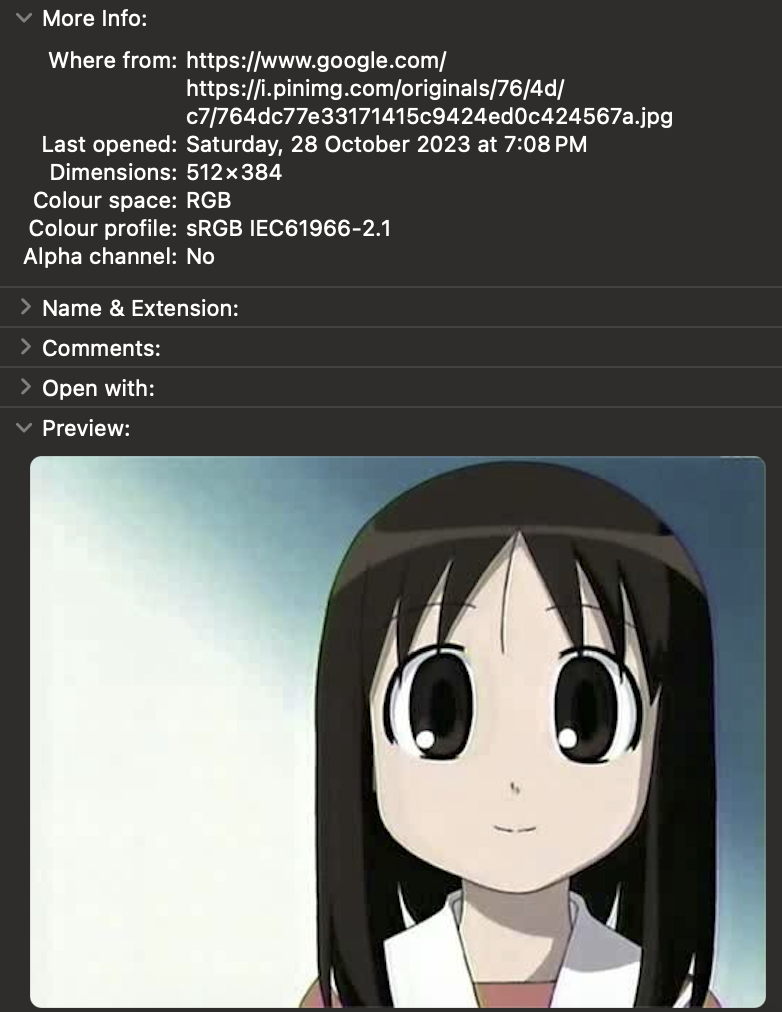

Наиболее распространенной и мощной библиотекой для работы с изображениями является **PIL**

Будет существовать функция в которую в качестве аргумента будет поступать путь картинки


In [ ]:
# Минимальная рабочая версия
def resize_to_96x96(path):
    img = Image.open(path)
    resized_img = img.resize((96, 96))
    resized_img.save("output.jpg")

Начал с простейшей реализации, чтобы проверить работоспособность

### Далее я считаю что

* нужно разобрать исходный путь на имя и расширение тогда я смогу создать новое имя, добавив суффикс _96x96 к оригинальному имени, и сохранить файл с оригинальным расширением, для этого мне нужна функция **os.path.splitext()**


* Pillow предлагает несколько алгоритмов ресайза, LANCZOS — самый качественный для уменьшения изображений, он лучше всего сглаживает артефакты как мне сказал ИИ в Google      
*(Image.LANCZOS (Lanczos Resampling): Often considered the highest quality filter for downscaling, LANCZOS uses a sinc function to perform a more sophisticated interpolation, providing a good balance of sharpness and artifact reduction. It's computationally more intensive than BILINEAR or BICUBIC.)*

* весь процесс работы с файлом нужно обернуть в try-except, в случае успеха — сообщим пользователю, куда сохранился файл, в случае ошибки — сообщим, с каким именно файлом проблема и в чем она заключается, но не остановим выполнение (если в будущем добавим цикл для нескольких файлов)


In [ ]:
from PIL import Image
import os

def resize_to_96x96(path):
    try:
        img = Image.open(path)

        resized_img = img.resize((96, 96), Image.Resampling.LANCZOS)

        filename, ext = os.path.splitext(path)
        output_path = f"{filename}_96x96{ext}"

        resized_img.save(output_path)
        print(f"Успешно: {path} -> {output_path}")

    except Exception as e:
        print(f"Ошибка с {path}: {str(e)}")

In [ ]:
path = "/content/764dc77e33171415c9424ed0c424567a.jpeg"
resize_to_96x96(path)

Успешно: /content/764dc77e33171415c9424ed0c424567a.jpeg -> /content/764dc77e33171415c9424ed0c424567a_96x96.jpeg


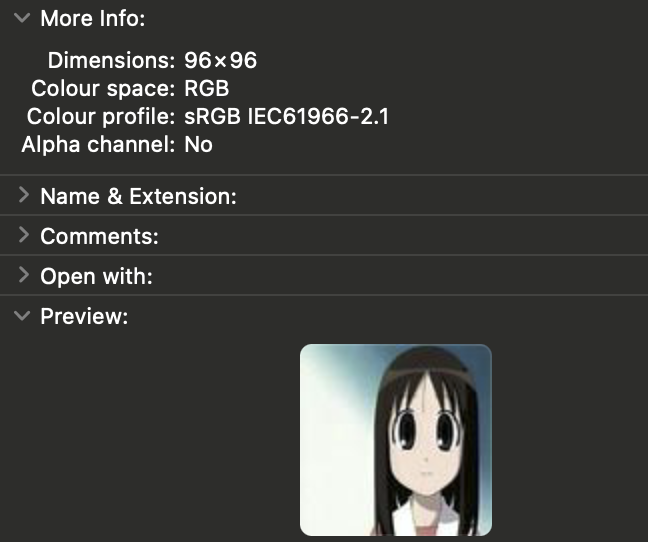